In [ ]:
import pandas as pd
import matplotlib.pyplot as pd
import tensorflow as tf
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
from IPython.display import Image
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

In [ ]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
from tensorflow.python.ops.image_ops_impl import rgb_to_grayscale
train_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Global_AI_Hub_Proje/spectrograms",
                                                      validation_split=0.2,
                                                      subset="training",
                                                      seed=123,
                                                      image_size=(img_height, img_width),
                                                      batch_size=batch_size)

Found 8732 files belonging to 10 classes.
Using 6986 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Global_AI_Hub_Proje/spectrograms",
                                                      validation_split=0.2,
                                                      subset="validation",
                                                      seed=123,
                                                      image_size=(img_height, img_width),
                                                      batch_size=batch_size)

Found 8732 files belonging to 10 classes.
Using 1746 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


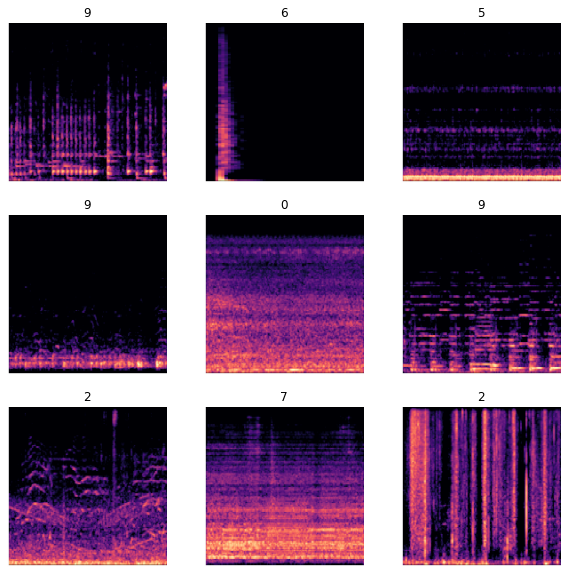

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Veri normalizasyon işlemleri

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Model Training

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
results = model.fit(train_ds,
          validation_data=val_ds,
          epochs=3)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


219/219 [==============================] - 912s 4s/step - loss: 1.2208 - accuracy: 0.5764 - val_loss: 0.8217 - val_accuracy: 0.7377
Epoch 2/3
219/219 [==============================] - 35s 155ms/step - loss: 0.6216 - accuracy: 0.8010 - val_loss: 0.6792 - val_accuracy: 0.7938
Epoch 3/3
219/219 [==============================] - 35s 155ms/step - loss: 0.3593 - accuracy: 0.8832 - val_loss: 0.6592 - val_accuracy: 0.8041


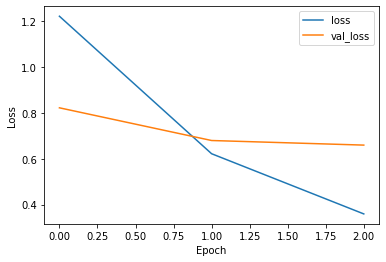

In [ ]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

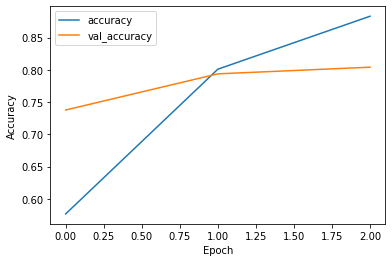

In [ ]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.show()